In [1]:
using DifferentialEquations, ModelingToolkit, Plots

@parameters t σ α
@variables x(t) y(t) # x is the State Variable; y the differentiation factor (aka bifurcation paramet
@derivatives D' ~ t


eqs = [ D(x) ~ y*x-x^3, D(y) ~ α]
noiseeqs = [σ*x, σ*y] # add states (LISI)

potential = SDESystem(eqs, noiseeqs, t, [x,y], [α,σ])

initval = [x => -5.0,y => -5.0] # modify X start -5 (LISI)

tspan = (0.0, 30.0);
params = [α => 0.5, σ => 0.1]
prob = SDEProblem(potential, initval, tspan, params, noise = WienerProcess(0.0, 0.0)); # modify noise to 2D

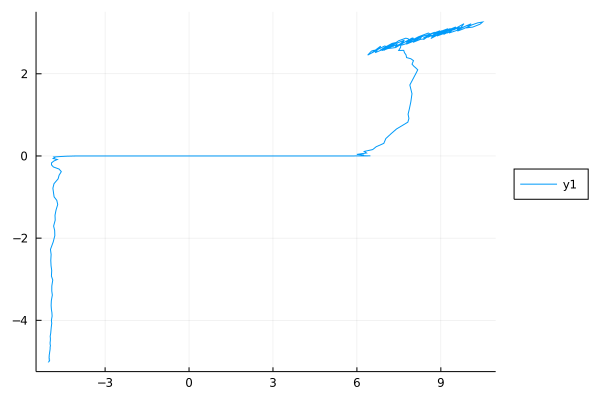

In [2]:
sol = Array(solve(prob))
plot(sol[2,:], sol[1,:], legend = :outerright)

In [3]:
using KernelDensity

In [4]:
kde_sol_2 = kde(sol[2,:]).density;

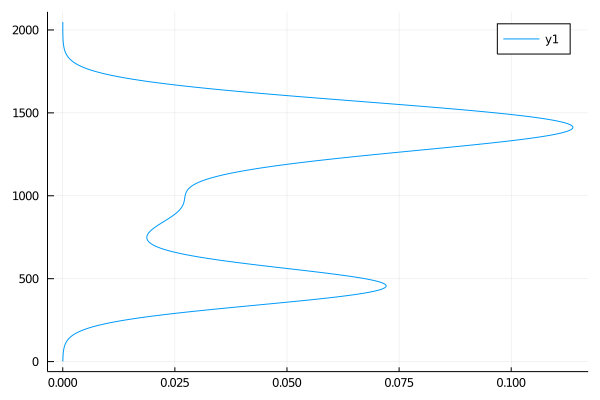

In [5]:
plot(kde_sol_2, 1:length(kde_sol_2))

In [6]:
sols = [Array(solve(prob)) for i in 1:99];
sols_kde_dens = [kde(sols[i][2,:]).density for i in 1:99];

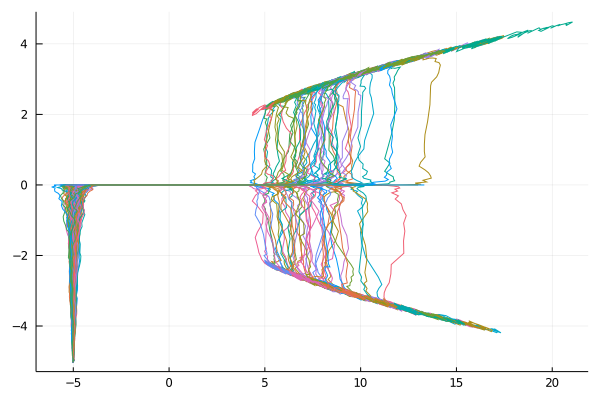

In [7]:
plt = plot()
plts = [plot!(plt, sols[i][2,:], sols[i][1,:],label = "") for i in 1:99]
plot(plt)

In [11]:
plt = plot()
plts = [plot!(plt, sols_kde_dens[i], 1:length(sols_kde_dens[i]), label = "") for i in 1:99]
plot(plt)

In [43]:
mins = [min(sols[1][2,:]...) for i in 1:99];
maxs = [max(sols[1][2,:]...) for i in 1:99];
min_lim = min(mins...)
max_lim = max(maxs...)
function counter_loss(prediction)
    lims = Array(range(min_lim, step = 0.05, stop = max_lim))
    counter_of_prediction = [count(x -> lims[ind_lim] <= x < lims[ind_lim + 1], prediction) for ind_lim in 1:length(lims) - 1]
    return counter_of_prediction
end

counter_loss (generic function with 1 method)

In [44]:
counts = [counter_loss(sols[i][2,:]) for i in 1:99];

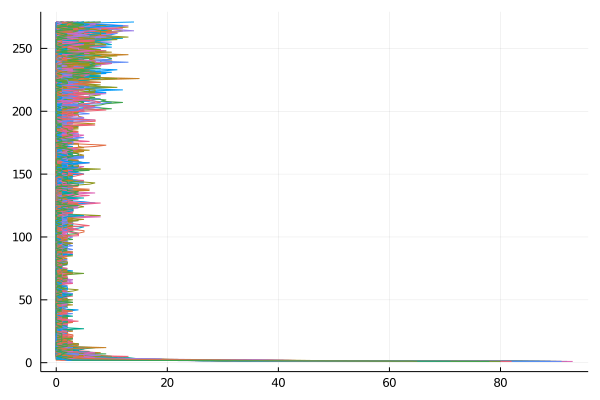

In [45]:
plt = plot()
plts = [plot!(plt, counts[i], 1:length(counts[i]), label = "") for i in 1:99]
plot(plt)

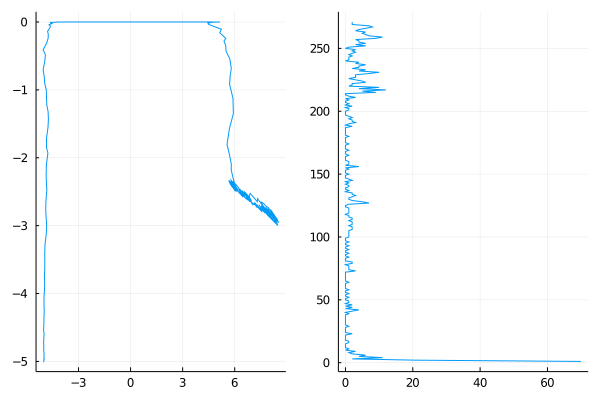

In [47]:
p1 = plot(sols[1][2,:], sols[1][1,:],label ="")
p2 = plot( counts[1], 1:length(counts[1]), label = "")
plot(p1,p2)